In [2]:
import os
import glob
import copy
import time
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import random

def random_pick(some_list,probabilities):
    x = random.uniform(0,1)
    cumulative_probability=0.0
    for item, item_probability in zip(some_list,probabilities):
        cumulative_probability+=item_probability
        if x < cumulative_probability:
            break
    return item

train_dict = {}
train_dict["time_stamp"] = time.strftime("%Y-%m-%d_%H:%M:%S", time.localtime())
train_dict["project_name"] = "pixel_xyz"
train_dict["save_folder"] = "./project_dir/"+train_dict["project_name"]+"/"

train_dict["folder_X"] = "./data_dir/norm_MR/discrete/"
train_dict["folder_Y"] = "./data_dir/norm_CT/discrete/"

X_list = sorted(glob.glob(train_dict["folder_X"]+"*.nii.gz"))
Y_list = sorted(glob.glob(train_dict["folder_Y"]+"*.nii.gz"))

n_bin = 128

len_x, len_y, len_z = 256, 256, 182

test_MR = "./data_dir/norm_MR/NORM_097.nii.gz"
MR_file = nib.load(test_MR)
MR_data = MR_file.get_fdata()
MR_pred = np.zeros(MR_data.shape)
print(MR_data.shape)


(256, 256, 182)


In [5]:
loc = [167, 177, 43]

CT_database = np.zeros((11, 11, 11, len(X_list)))

for cnt_file, file_path in enumerate(X_list):
     
    file_name = os.path.basename(file_path)
    cube_x_path = file_path
    cube_y_path = train_dict["folder_Y"] + file_name
    print("--->",cube_x_path,"<---")
#     cube_x_data = nib.load(cube_x_path).get_fdata()
    cube_y_data = nib.load(cube_y_path).get_fdata()
#     len_x, len_y, len_z = cube_x_data.shape
    
    CT_database[:, :, :, cnt_file] = cube_y_data[loc[0]-5:loc[0]+6, loc[1]-5:loc[1]+6, loc[2]-5:loc[2]+6]

---> ./data_dir/norm_MR/discrete/NORM_001.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_002.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_003.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_004.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_005.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_006.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_007.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_008.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_010.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_011.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_012.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_013.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_014.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_015.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_017.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_018.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_019.nii.gz <---
---> ./data_dir/norm_MR/discrete/NORM_020.nii.gz <---
---> ./data_dir/norm_MR/disc

In [6]:
CT_database.shape

(11, 11, 11, 62)

(array([6.000e+00, 1.460e+02, 5.900e+01, 1.600e+01, 8.000e+00, 0.000e+00,
        8.000e+00, 1.300e+01, 1.400e+01, 7.000e+00, 6.000e+00, 0.000e+00,
        3.000e+00, 8.000e+00, 3.000e+00, 6.000e+00, 0.000e+00, 6.000e+00,
        6.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 0.000e+00, 1.000e+01,
        1.000e+01, 9.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 9.000e+00,
        2.100e+01, 1.840e+02, 4.540e+02, 0.000e+00, 6.940e+02, 9.520e+02,
        1.058e+03, 2.362e+03, 0.000e+00, 2.771e+03, 1.268e+03, 1.129e+03,
        1.463e+03, 1.775e+03, 0.000e+00, 1.596e+03, 1.775e+03, 2.912e+03,
        4.242e+03, 3.825e+03, 0.000e+00, 2.422e+03, 2.295e+03, 1.908e+03,
        1.667e+03, 0.000e+00, 1.416e+03, 1.444e+03, 1.486e+03, 1.440e+03,
        1.413e+03, 0.000e+00, 1.387e+03, 1.411e+03, 1.420e+03, 1.380e+03,
        0.000e+00, 1.500e+03, 1.527e+03, 1.517e+03, 1.545e+03, 1.588e+03,
        0.000e+00, 1.540e+03, 1.513e+03, 1.517e+03, 1.480e+03, 0.000e+00,
        1.446e+03, 1.387e+03, 1.328e+0

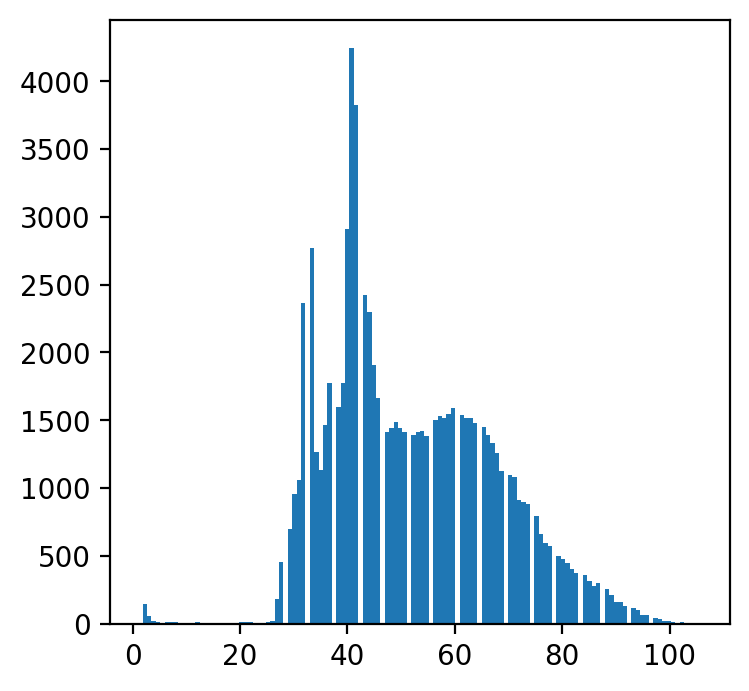

In [8]:
plt.figure(figsize=(4,4), dpi=200)
plt.hist(np.ravel(CT_database), bins=128)